                                   ADOPTION SPEED
                          (Modelo de adopción de mascotas)

In [878]:
#importar librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


In [879]:
df = pd.read_csv("pets.csv")


In [880]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [881]:
df.nunique()

Type                 2
Name              9059
Age                106
Breed1             176
Breed2             135
Gender               3
Color1               7
Color2               7
Color3               6
MaturitySize         4
FurLength            3
Vaccinated           3
Dewormed             3
Sterilized           3
Health               3
Quantity            19
Fee                 74
State               14
RescuerID         5595
VideoAmt             9
Description      14031
PetID            14993
PhotoAmt            31
AdoptionSpeed        5
dtype: int64

                              Objetivo: AdoptionSpeed

0: la mascota fue adoptada el mismo día en que figuraba en la lista.

1 - La mascota fue adoptada entre 1 y 7 días (1.ª semana) después de haber sido incluida en la lista.

2 - La mascota fue adoptada entre 8 y 30 días (1er mes) después de haber sido incluida en la lista.

3 - La mascota fue adoptada entre 31 y 90 días (segundo y tercer mes) después de haber sido incluida en la lista.

4 - No adopción después de 100 días de estar incluido en la lista. (No hay mascotas en este conjunto de datos que hayan esperado entre 90 y 100 días)

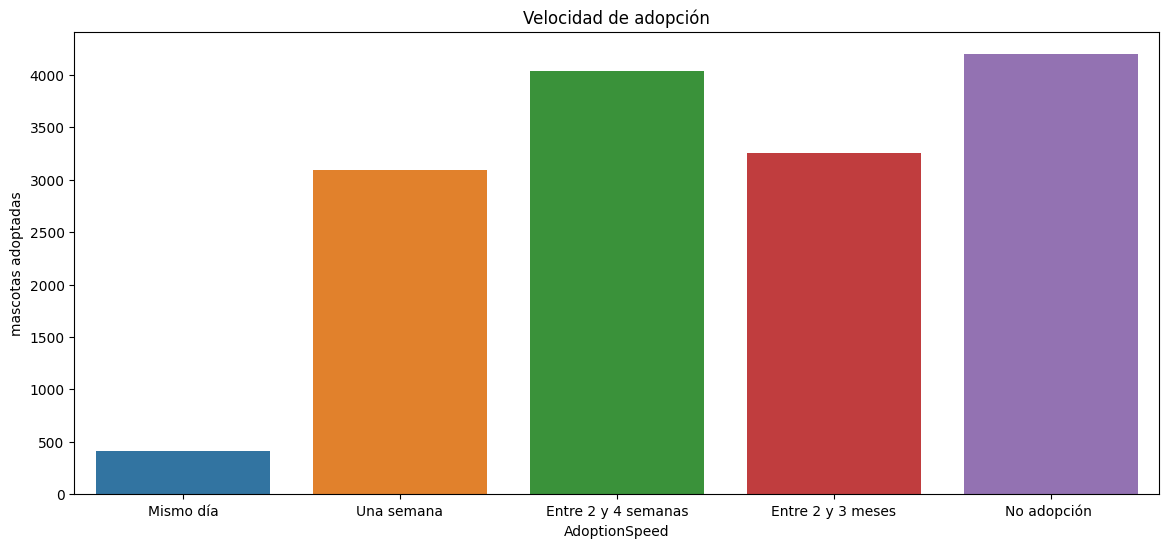

In [882]:

plt.figure(figsize=(14, 6))
g = sns.countplot(x='AdoptionSpeed', data=df)
plt.title('Velocidad de adopción')
# Agrega etiqueta en el eje y
plt.ylabel('mascotas adoptadas')

# Agrega etiquetas para las categorías del eje x
plt.xticks([0, 1, 2, 3, 4], ['Mismo día', 'Una semana', 'Entre 2 y 4 semanas', 'Entre 2 y 3 meses', 'No adopción '])


plt.show()

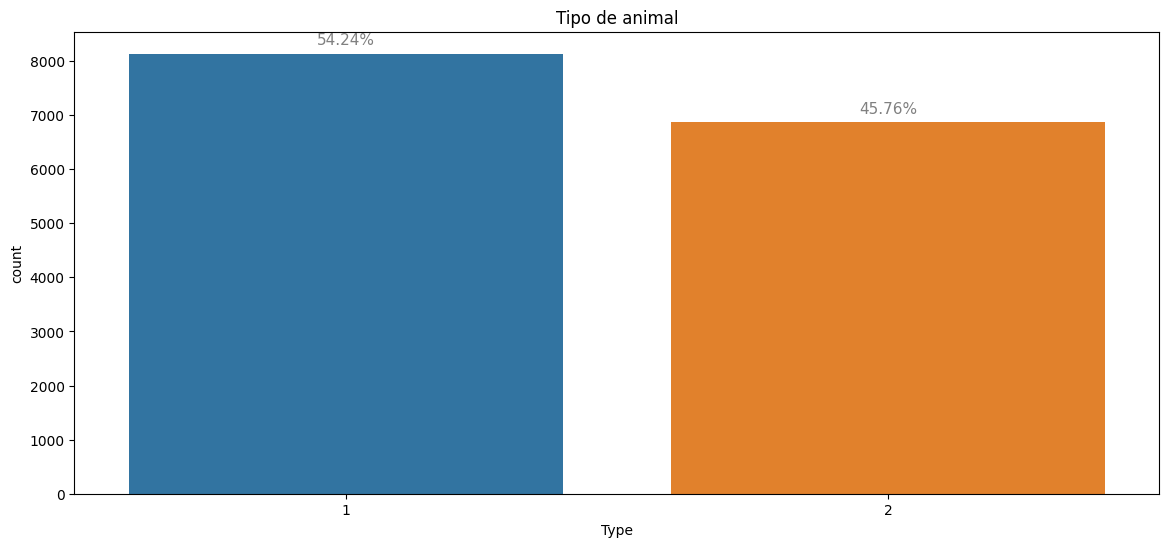

In [883]:
#Tipo de animal (1 = Perro, 2 = Gato)
plt.figure(figsize=(14, 6));
g = sns.countplot(x='Type', data=df)
plt.title('Tipo de animal');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points')  

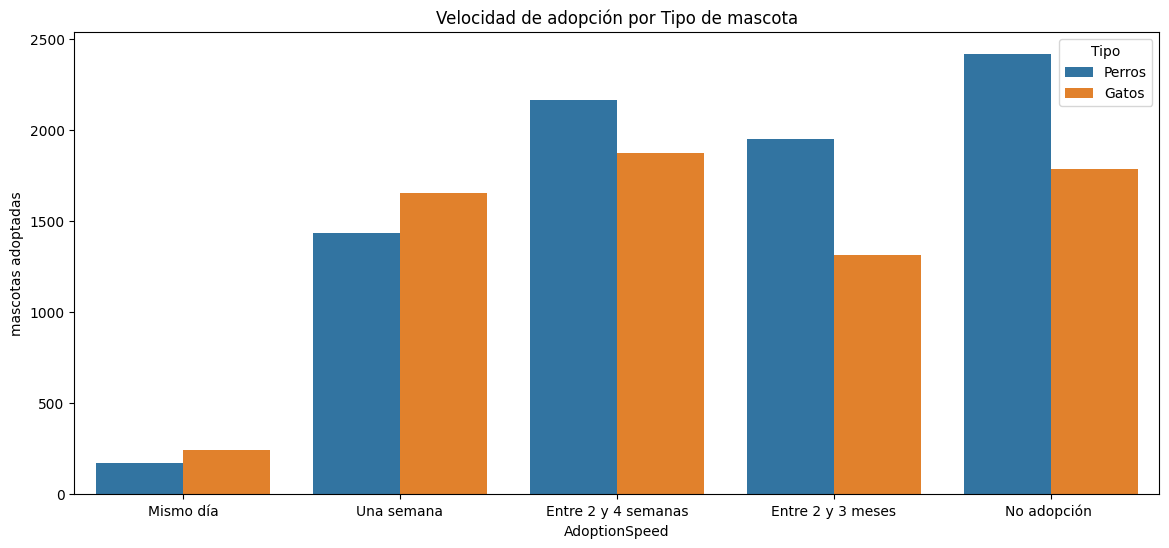

In [884]:


plt.figure(figsize=(14, 6))
g = sns.countplot(x='AdoptionSpeed', data=df, hue='Type')
plt.title('Velocidad de adopción por Tipo de mascota')

# Agrega etiqueta en el eje y
plt.ylabel('mascotas adoptadas')

# Agrega etiquetas para las categorías del eje x
plt.xticks([0, 1, 2, 3, 4], ['Mismo día', 'Una semana', 'Entre 2 y 4 semanas', 'Entre 2 y 3 meses', 'No adopción '])

# Agrega etiquetas para las categorías del eje hue
hue_labels = ['Perros', 'Gatos']  # Reemplaza con las etiquetas reales
g.legend(title='Tipo', labels=hue_labels)

plt.show()




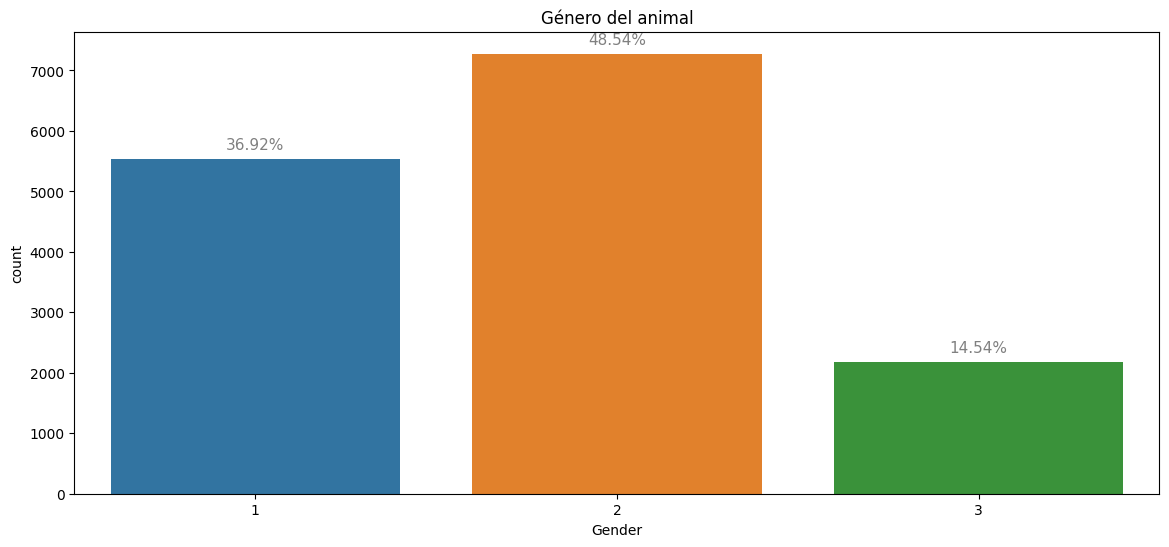

In [885]:
#género de la mascota (1 = Macho, 2 = Hembra, 3 = Mixto, si el perfil representa un grupo de mascotas)
plt.figure(figsize=(14, 6));
g = sns.countplot(x='Gender', data=df)
plt.title('Género del animal');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

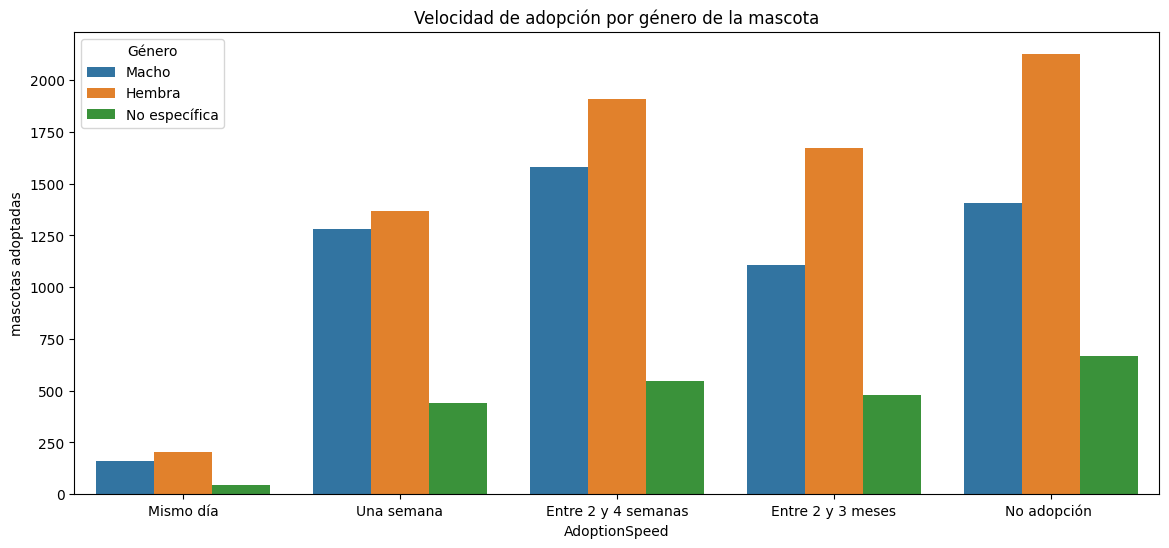

In [886]:


plt.figure(figsize=(14, 6))
g = sns.countplot(x='AdoptionSpeed', data=df, hue='Gender')
plt.title("Velocidad de adopción por género de la mascota")

# Agrega etiqueta en el eje y
plt.ylabel('mascotas adoptadas')

# Agrega etiquetas para las categorías del eje x
plt.xticks([0, 1, 2, 3, 4], ['Mismo día', 'Una semana', 'Entre 2 y 4 semanas', 'Entre 2 y 3 meses', 'No adopción '])

# Agrega etiquetas para las categorías del eje hue
hue_labels = ['Macho', 'Hembra',"No específica"]  # Reemplaza con las etiquetas reales
g.legend(title='Género', labels=hue_labels)

plt.show()


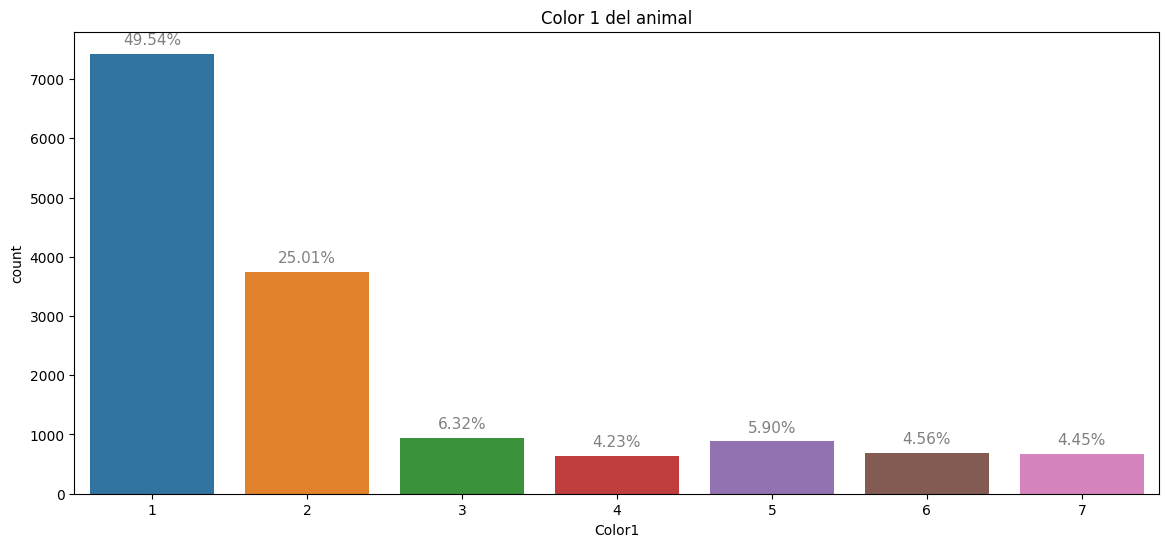

In [887]:
#Color1 - Color 1 de la mascota
plt.figure(figsize=(14, 6));
g = sns.countplot(x='Color1', data=df)
plt.title('Color 1 del animal');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

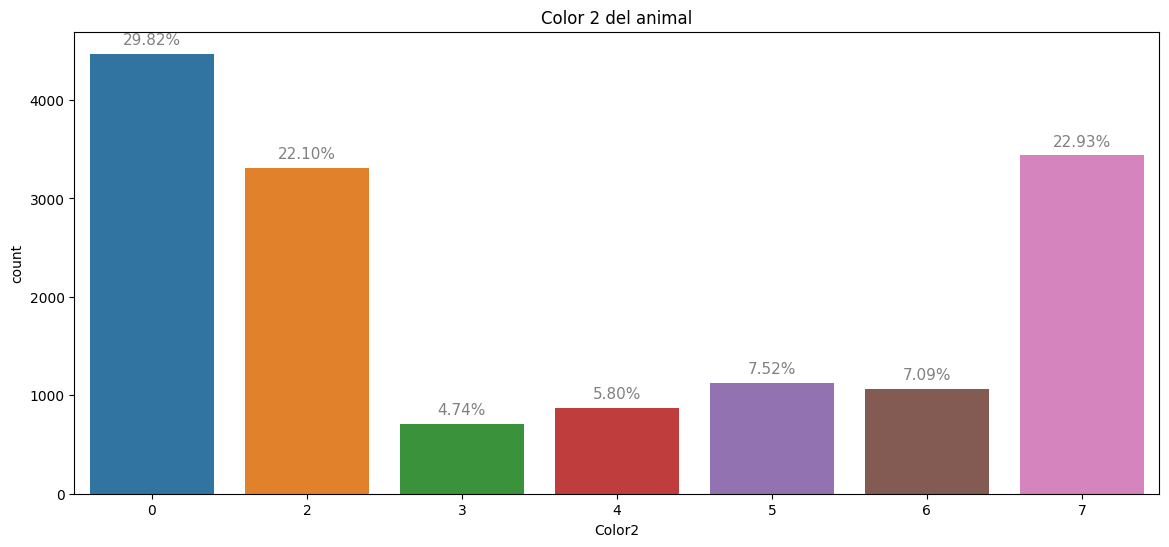

In [888]:
#Color2 - Color 2 de la mascota
plt.figure(figsize=(14, 6));
g = sns.countplot(x='Color2', data=df)
plt.title('Color 2 del animal');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

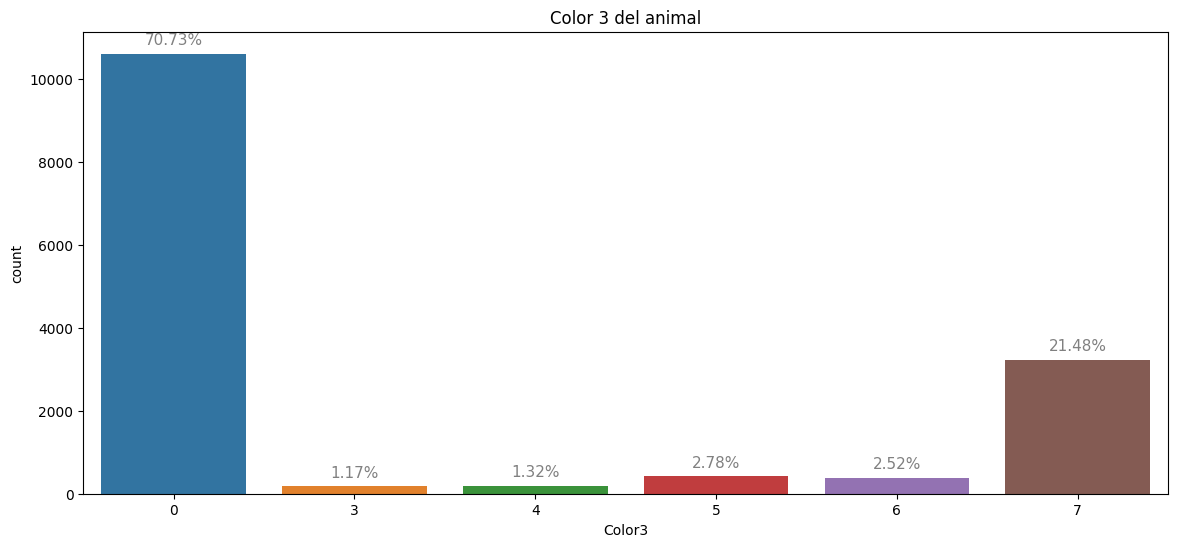

In [889]:
#Color3 - Color 3 de la mascota
plt.figure(figsize=(14, 6));
g = sns.countplot(x='Color3', data=df)
plt.title('Color 3 del animal');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

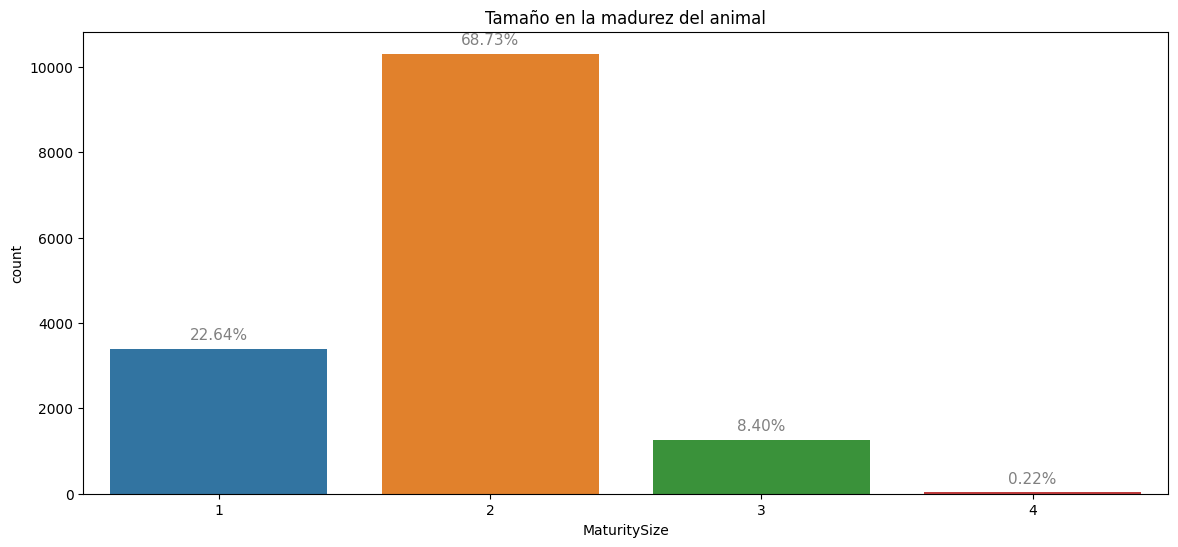

In [890]:
#tamaño en la madurez (1 = pequeño, 2 = mediano, 3 = grande, 4 = extra grande, 0 = no especificado)
plt.figure(figsize=(14, 6));
g = sns.countplot(x='MaturitySize', data=df)
plt.title('Tamaño en la madurez del animal');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

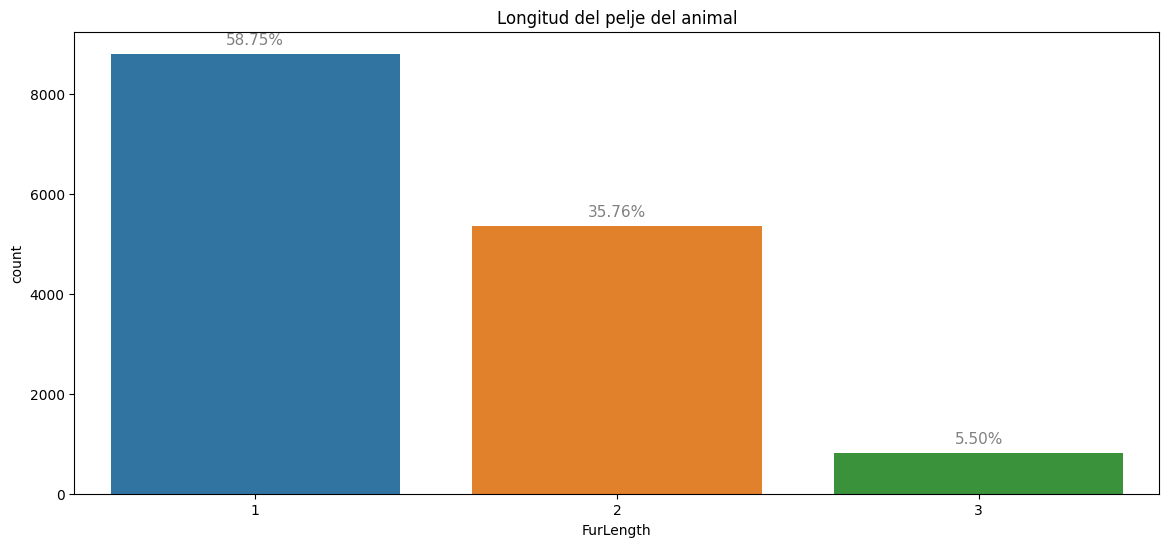

In [891]:
#longitud del pelaje (1 = Corto, 2 = Medio, 3 = Largo, 0 = No especificado)
plt.figure(figsize=(14, 6));
g = sns.countplot(x='FurLength', data=df)
plt.title('Longitud del pelje del animal');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

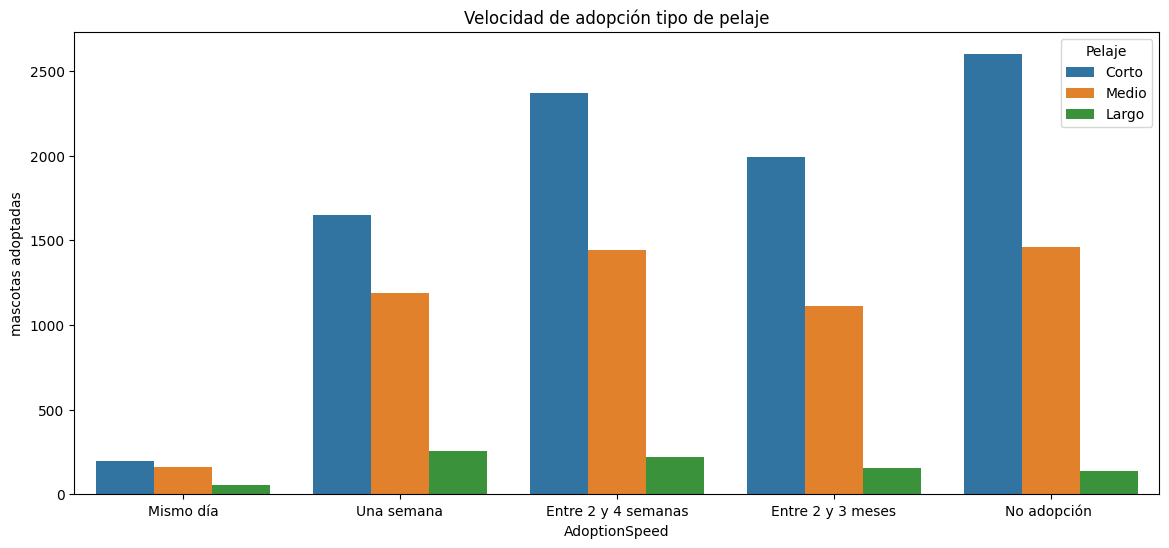

In [892]:


plt.figure(figsize=(14, 6))
g = sns.countplot(x='AdoptionSpeed', data=df, hue='FurLength')
plt.title("Velocidad de adopción tipo de pelaje")

# Agrega etiqueta en el eje y
plt.ylabel('mascotas adoptadas')

# Agrega etiquetas para las categorías del eje x
plt.xticks([0, 1, 2, 3, 4], ['Mismo día', 'Una semana', 'Entre 2 y 4 semanas', 'Entre 2 y 3 meses', 'No adopción '])

# Agrega etiquetas para las categorías del eje hue
hue_labels = ['Corto', 'Medio',"Largo"]  # Reemplaza con las etiquetas reales
g.legend(title='Pelaje', labels=hue_labels)

plt.show()

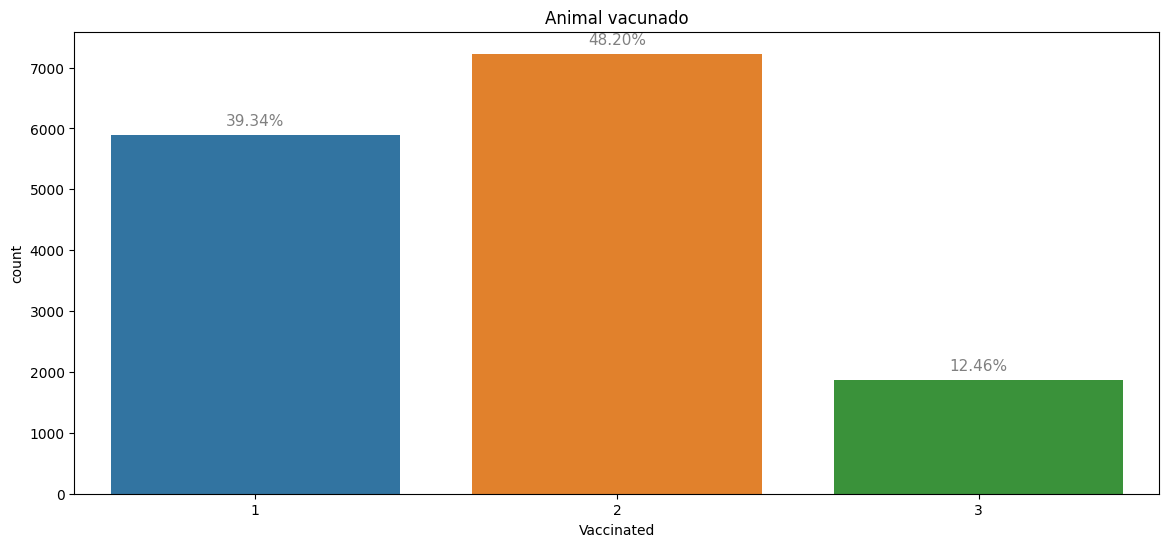

In [893]:
#la mascota ha sido vacunada (1 = Sí, 2 = No, 3 = No estoy seguro)
plt.figure(figsize=(14, 6));
g = sns.countplot(x='Vaccinated', data=df)
plt.title('Animal vacunado');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

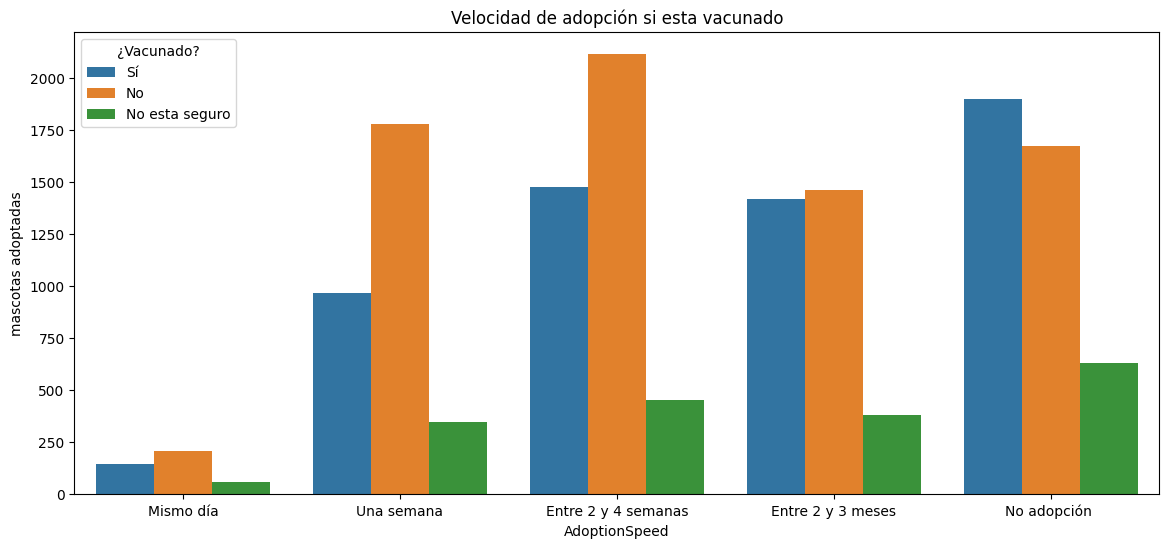

In [894]:

plt.figure(figsize=(14, 6))
g = sns.countplot(x='AdoptionSpeed', data=df, hue='Vaccinated')
plt.title("Velocidad de adopción si esta vacunado")

# Agrega etiqueta en el eje y
plt.ylabel('mascotas adoptadas')

# Agrega etiquetas para las categorías del eje x
plt.xticks([0, 1, 2, 3, 4], ['Mismo día', 'Una semana', 'Entre 2 y 4 semanas', 'Entre 2 y 3 meses', 'No adopción '])

# Agrega etiquetas para las categorías del eje hue
hue_labels = ['Sí', 'No',"No esta seguro"]  # Reemplaza con las etiquetas reales
g.legend(title='¿Vacunado?', labels=hue_labels)

plt.show()

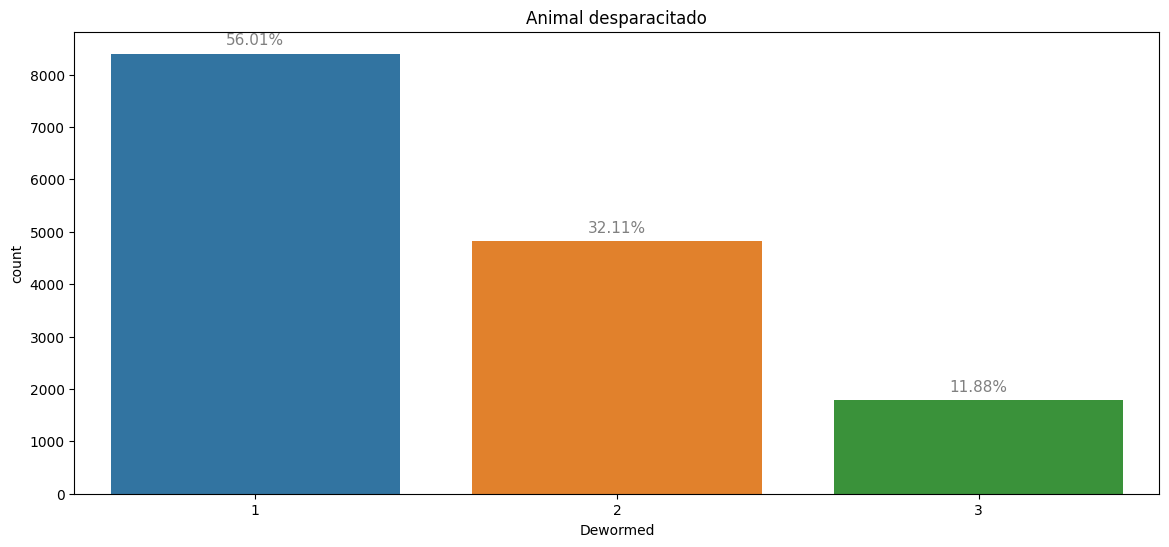

In [895]:
#la mascota ha sido desparasitada (1 = Sí, 2 = No, 3 = No estoy seguro)
plt.figure(figsize=(14, 6));
g = sns.countplot(x='Dewormed', data=df)
plt.title('Animal desparacitado');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

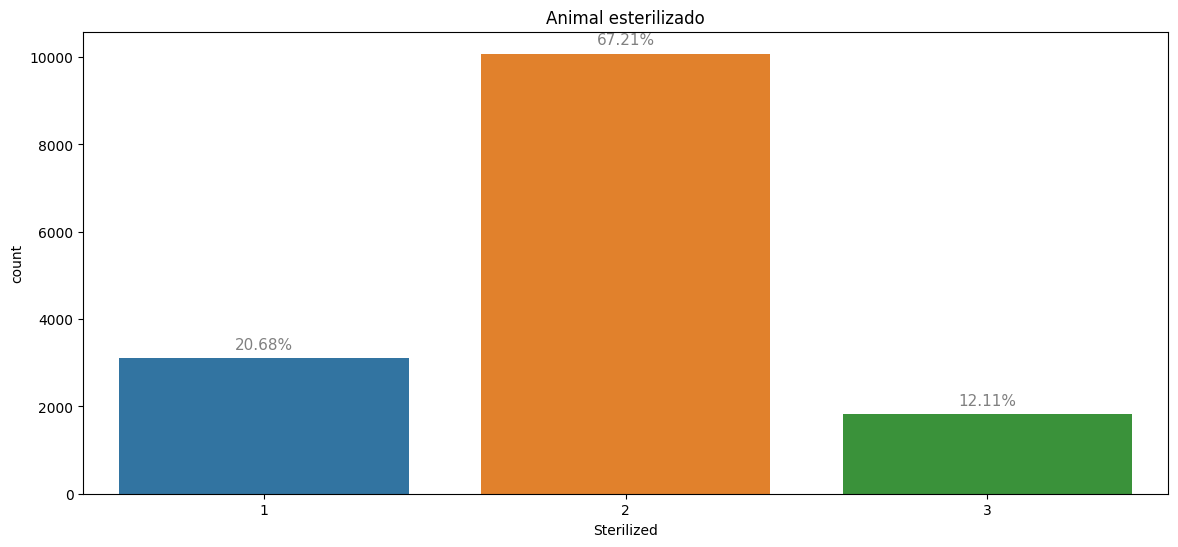

In [896]:
#La mascota ha sido esterilizada / castrada (1 = Sí, 2 = No, 3 = No estoy seguro)
plt.figure(figsize=(14, 6));
g = sns.countplot(x='Sterilized', data=df)
plt.title('Animal esterilizado');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

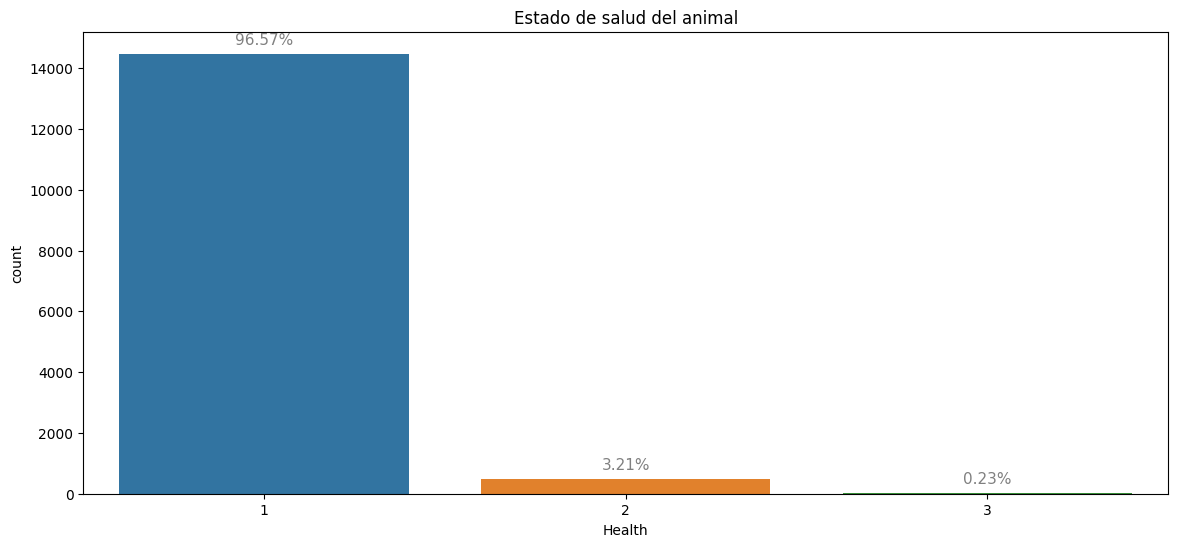

In [897]:
# Estado de salud (1 = Sano, 2 = Lesión leve, 3 = Lesión grave, 0 = No especificado)
plt.figure(figsize=(14, 6));
g = sns.countplot(x='Health', data=df)
plt.title('Estado de salud del animal');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

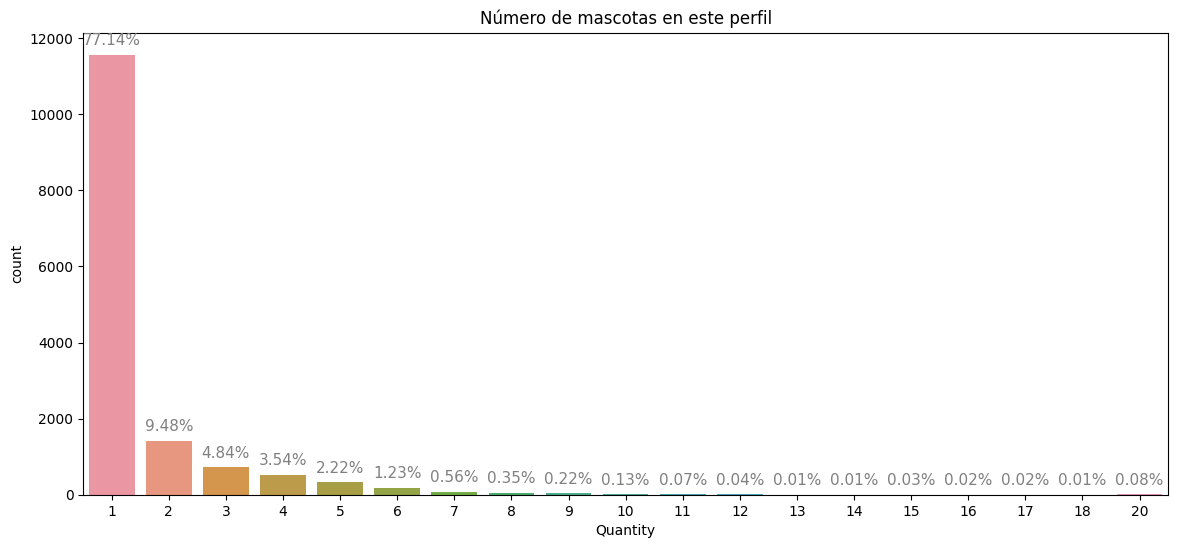

In [898]:
# Número de mascotas representadas en el perfil
plt.figure(figsize=(14, 6));
g = sns.countplot(x='Quantity', data=df)
plt.title('Número de mascotas en este perfil');
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

C:\Users\famil\AppData\Local\Temp\ipykernel_12576\3924186047.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


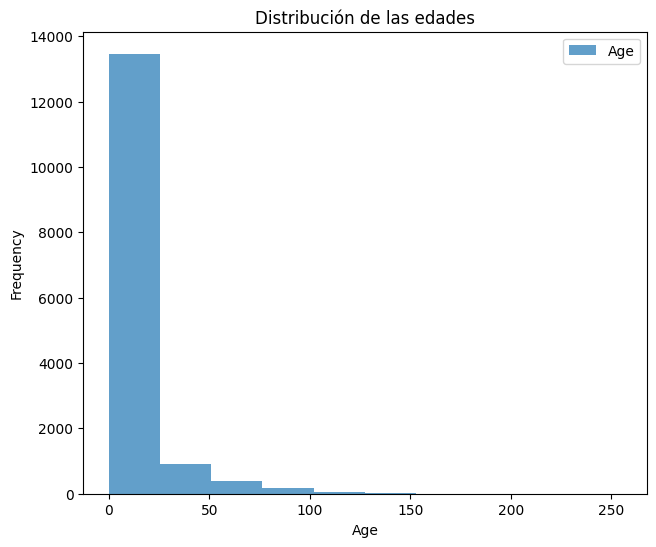

In [899]:

fig, ax = plt.subplots(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.title('Distribución de las edades')
df['Age'].plot(kind='hist', alpha=0.7)  # Utiliza 'kind' como argumento de palabra clave
plt.xlabel('Age')
plt.legend()

# Si deseas comparar con una distribución de prueba, descomenta y ajusta según tus datos
# df_test['Age'].plot(kind='hist', label='test', alpha=0.7)
# plt.legend()

plt.show()



                                  Tipos de razas

Mixed_Breed__-                                      5573

Domestic_Short_Hair__-                              4042

Domestic_Medium_Hair__-                             1264

Mixed_Breed__Mixed_Breed                            1188

Tabby__-                                             379

Domestic_Short_Hair__Domestic_Short_Hair             320

Domestic_Long_Hair__-                                244

Shih_Tzu__-                                          204

Poodle__-                                            153

Siamese__-                                           152

Labrador_Retriever__Mixed_Breed                      132

Golden_Retriever__-                                  123

Domestic_Medium_Hair__Domestic_Medium_Hair           110

Domestic_Medium_Hair__Domestic_Short_Hair            104

Calico__-                                            101

                            
                                   BOXPLOT

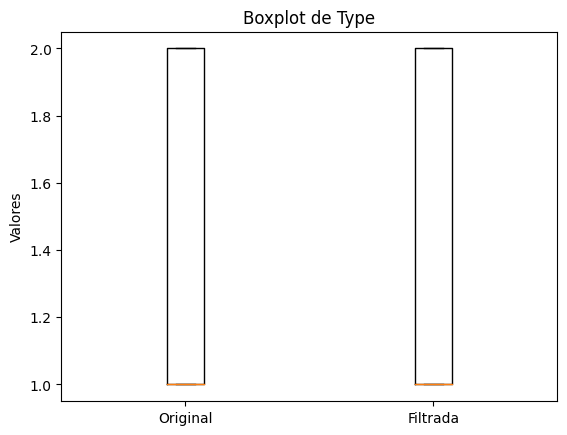

In [900]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'Type'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

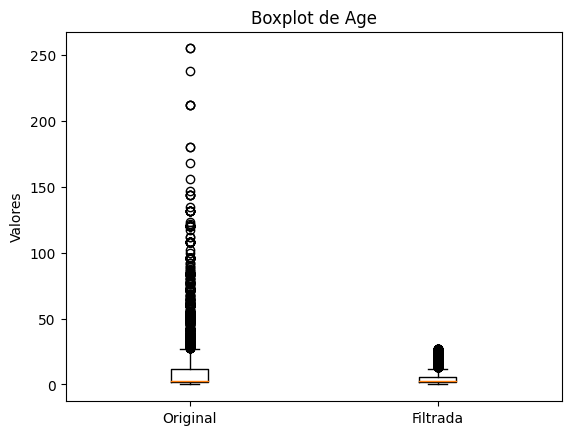

In [901]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'Age'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

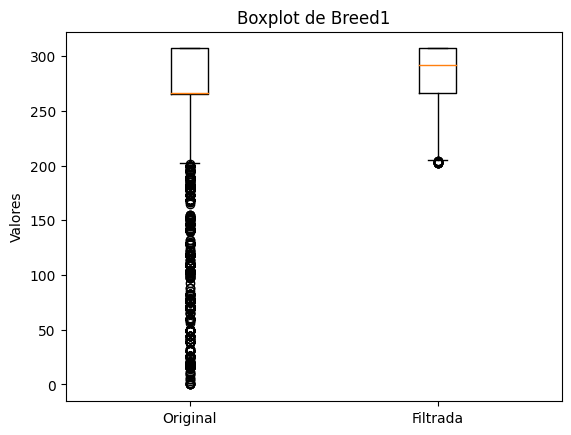

In [902]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'Breed1'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

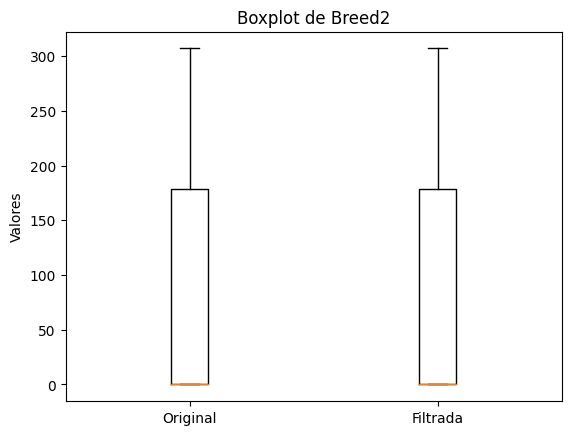

In [903]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'Breed2'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

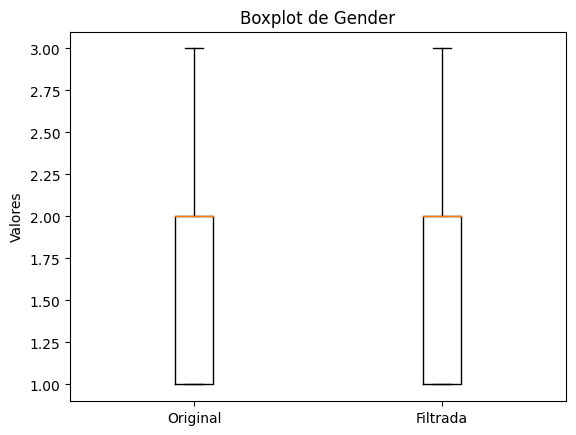

In [904]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'Gender'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

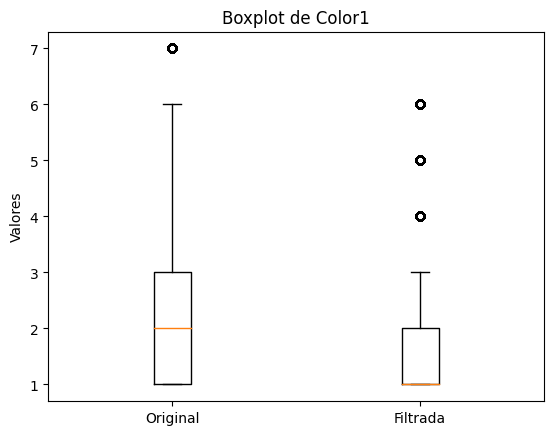

In [905]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'Color1'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

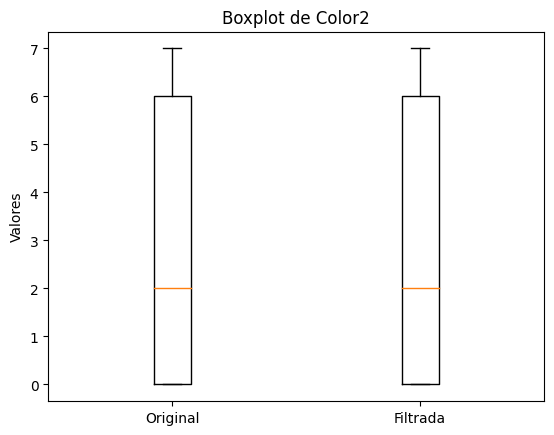

In [906]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'Color2'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

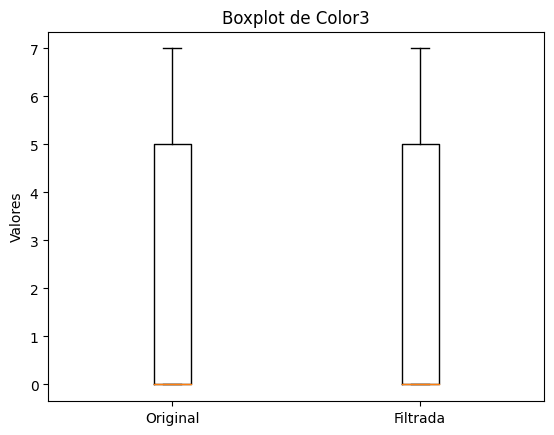

In [907]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'Color3'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

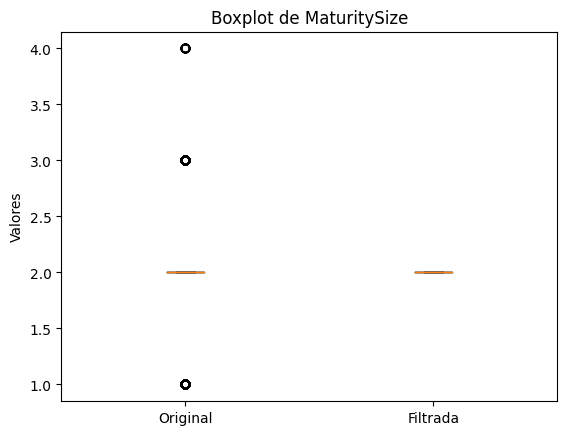

In [908]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'MaturitySize'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

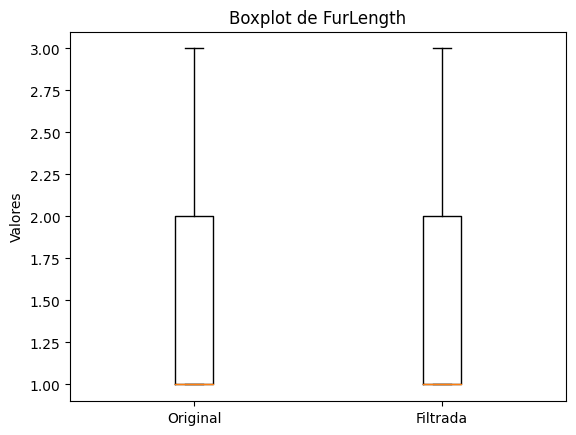

In [909]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'FurLength'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

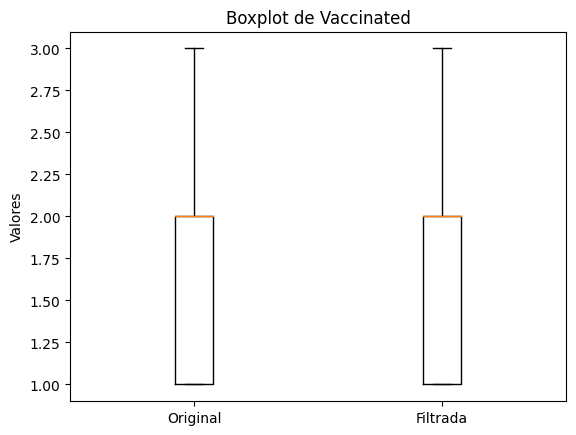

In [910]:
# Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'Vaccinated'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

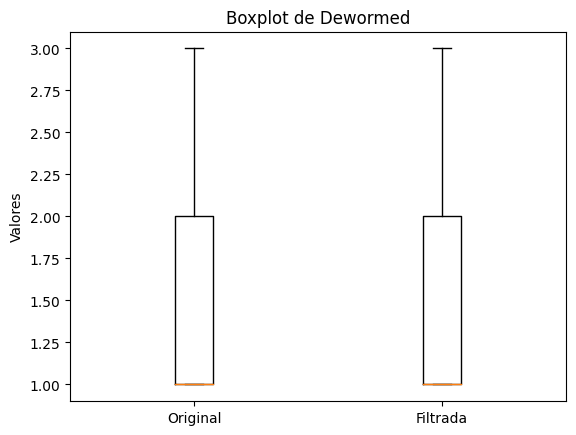

In [911]:
#Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'Dewormed'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

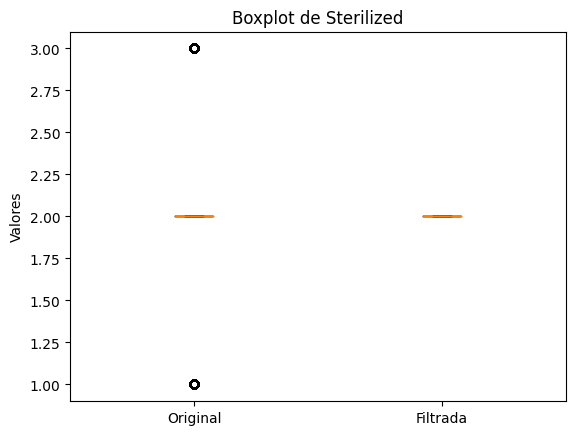

In [912]:
#Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'Sterilized'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

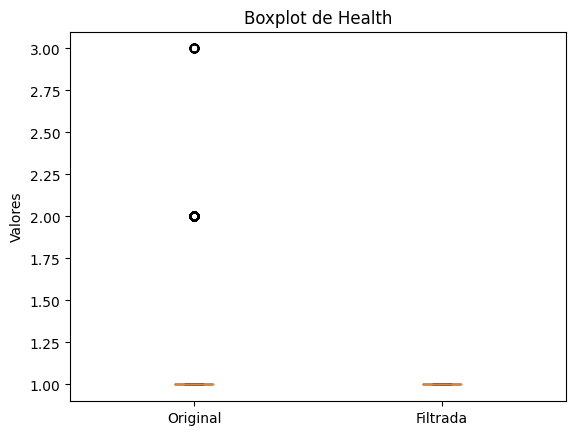

In [913]:
#Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'Health'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

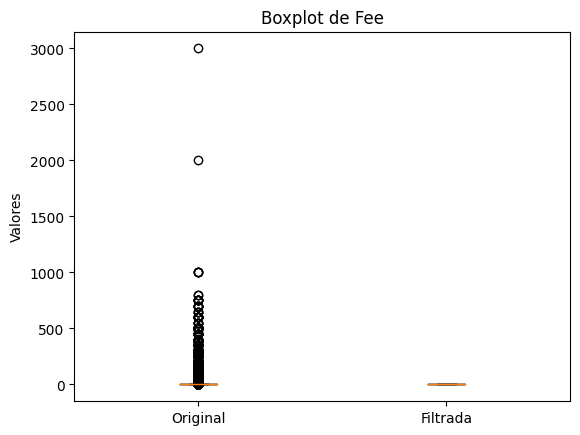

In [914]:
#Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'Fee'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

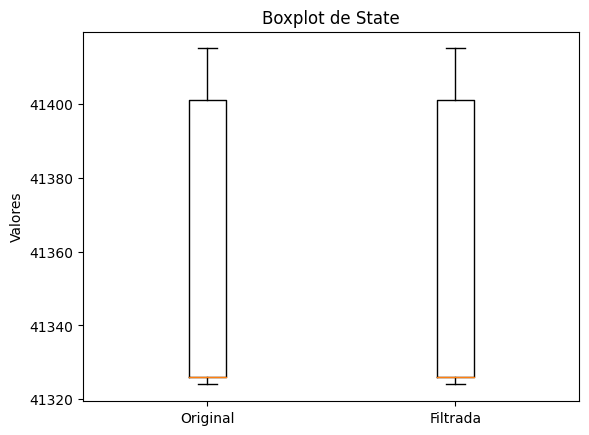

In [915]:
#Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'State'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

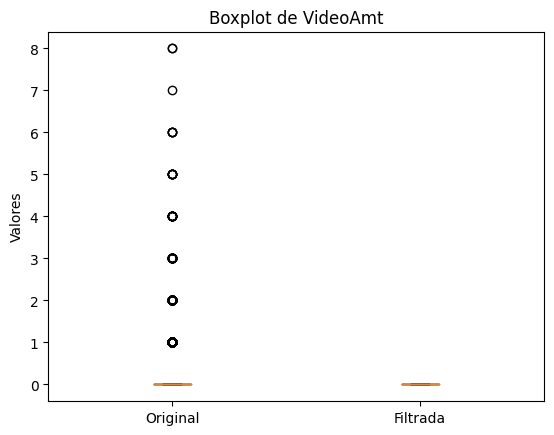

In [916]:
#Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'VideoAmt'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

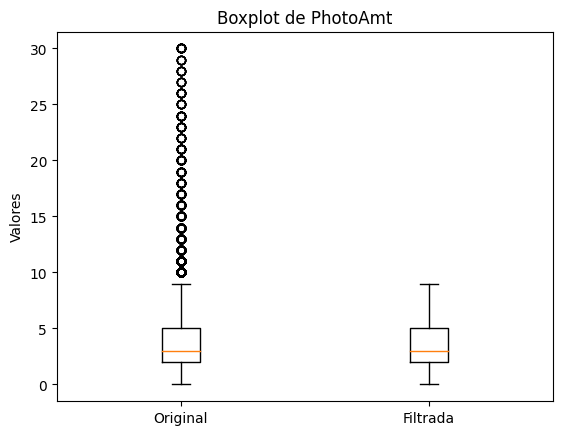

In [917]:
#Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'PhotoAmt'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

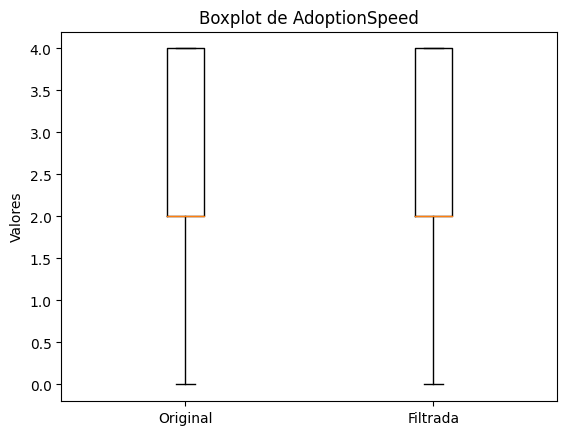

In [918]:
#Seleccionamos la variable para la cual deseamos identificar los outliers
variable_of_interest = 'AdoptionSpeed'
# Aplicamos el método de IQR para identificar outliers
Q1 = df[variable_of_interest].quantile(0.25)
Q3 = df[variable_of_interest].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtramos los datos para eliminar los outliers
data_filtered = df[(df[variable_of_interest] >= lower_bound) & (df[variable_of_interest] <= upper_bound)]
# Crea un boxplot para visualizar la variable original y la variable filtrada
plt.boxplot([df[variable_of_interest], data_filtered[variable_of_interest]], labels=['Original', 'Filtrada'])
plt.title(f'Boxplot de {variable_of_interest}')
plt.ylabel('Valores')
plt.show()

                                Limpiamos los datos

Es necesario elimanar variables que no aportan al modelo como nombre, id, id del rescatista y descripción. 

In [919]:
df = df.drop(columns=["Name","RescuerID","PetID","Description"])
df = df.drop(columns=["VideoAmt","PhotoAmt","State","Quantity"])

                                     Correlaciones

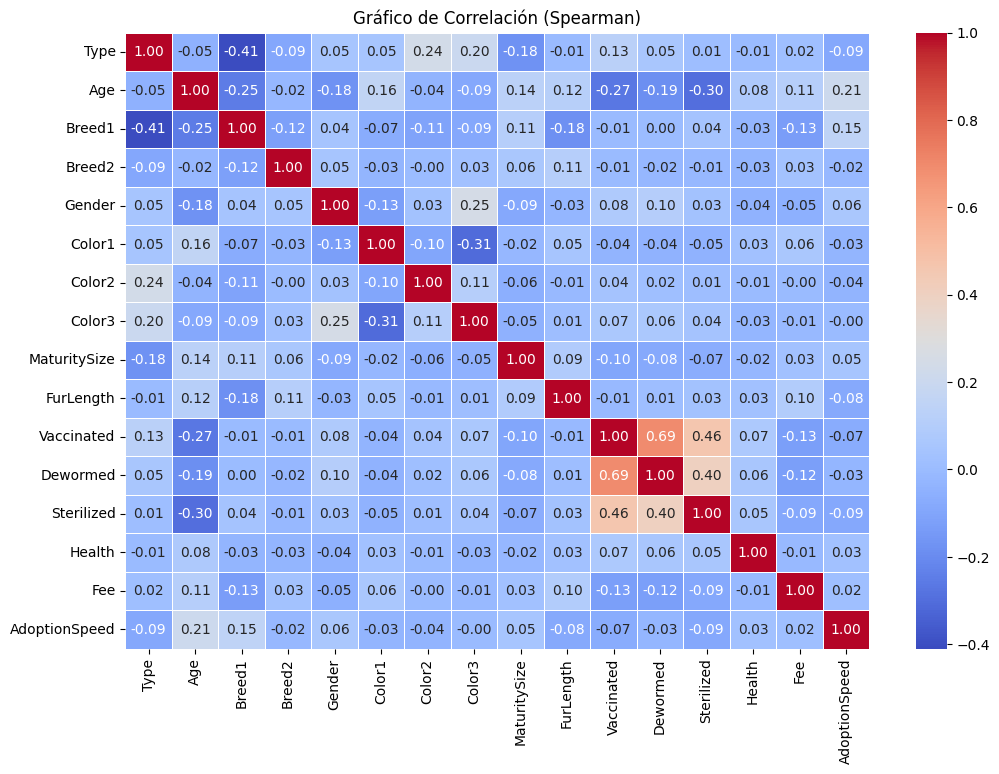

In [920]:
correlation_matrix = df.corr(method='spearman')

# Crea un gráfico de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Gráfico de Correlación (Spearman)")
plt.show()


                             Regresión logistica multinomial

In [921]:
# Dividimos los datos en variables independientes X, y variable dependiente y (especies)
X = df.drop(["AdoptionSpeed"],axis = 1)
y = df.AdoptionSpeed

     

In [922]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [923]:
# Definimos la configuración del clasificador
from sklearn.linear_model import LogisticRegression
logisticRegrIris = LogisticRegression(max_iter=1000)
## obtenido de (Restrepo, 2021)

In [924]:
logisticRegrIris.fit(X_train, y_train)

C:\Users\famil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       132
           1       0.30      0.23      0.26       931
           2       0.28      0.34      0.31      1212
           3       0.35      0.05      0.09       969
           4       0.36      0.62      0.45      1254

    accuracy                           0.32      4498
   macro avg       0.26      0.25      0.22      4498
weighted avg       0.31      0.32      0.28      4498



C:\Users\famil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\famil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\famil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

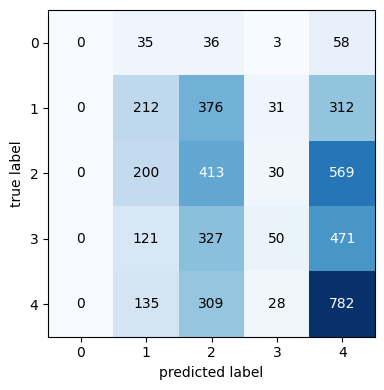

In [925]:

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
ypred = logisticRegrIris.predict(X_test)
matriz = confusion_matrix(y_test,ypred)

plot_confusion_matrix(conf_mat=matriz, figsize=(4,4), show_normed=False)
plt.tight_layout()
print(classification_report(y_test, ypred))
## obtenido de (Restrepo, 2021)

                                     KNNN        

In [926]:
x_1 = df.drop(["AdoptionSpeed"],axis = 1)
y_1 = df.AdoptionSpeed


In [927]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(x_1, y_1, test_size=0.40, random_state=SEED)
print('Son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0], X_test.shape[0]))


Son 8995 datos para entrenamiento y 5998 datos para prueba


In [928]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [929]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [930]:
# Tras ajustar el KNeighborsClassifier, podemos predecir las clases de los datos de prueba:
y_pred = classifier.predict(X_test)

In [931]:
acc =  classifier.score(X_test, y_test)
print(acc) 

0.29826608869623206


              precision    recall  f1-score   support

           0       0.05      0.07      0.06       191
           1       0.26      0.42      0.32      1246
           2       0.29      0.32      0.31      1562
           3       0.30      0.20      0.24      1297
           4       0.45      0.29      0.35      1702

    accuracy                           0.30      5998
   macro avg       0.27      0.26      0.25      5998
weighted avg       0.32      0.30      0.30      5998



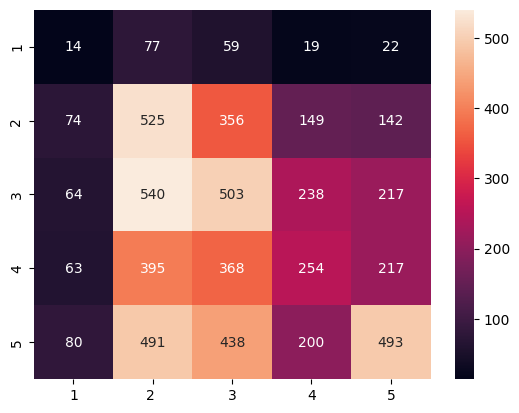

In [932]:
from sklearn.metrics import classification_report, confusion_matrix

# Adding classes names for better interpretation
classes_names = ['1','2 ','3',"4","5"]
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred))

In [933]:
from sklearn.metrics import f1_score

f1s = []

# Calculating f1 score for K values between 1 and 50
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    # using average='weighted' to calculate a weighted average for the 3 classes 
    f1s.append(f1_score(y_test, pred_i, average='weighted'))

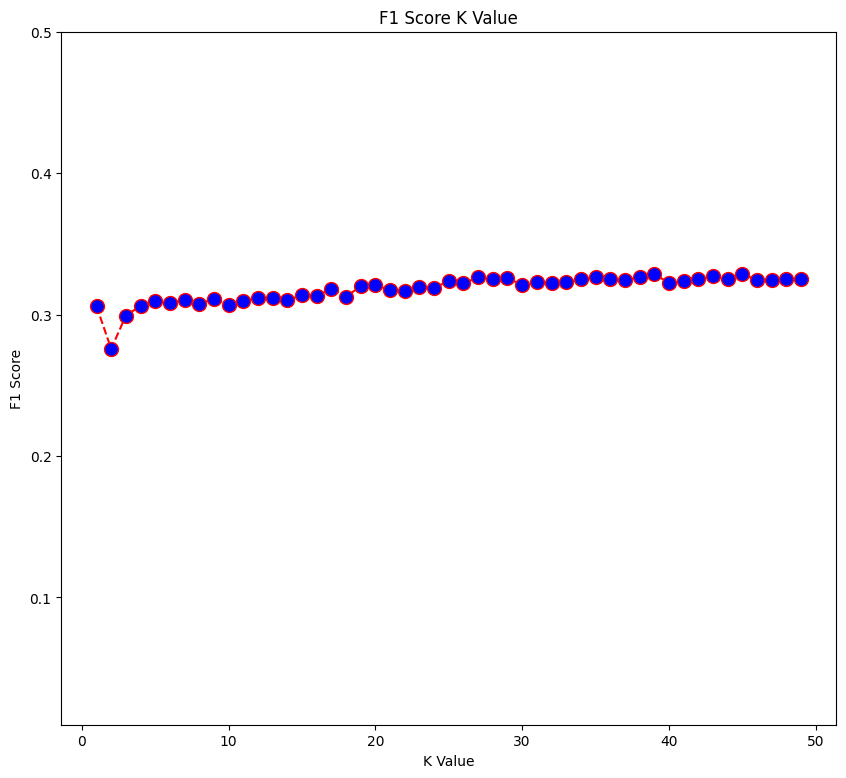

In [934]:
plt.figure(figsize=(10, 9))
plt.plot(range(1, 50), f1s, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('F1 Score K Value')
plt.xlabel('K Value')
plt.ylabel('F1 Score')
plt.ylim(0.01, 0.5)
plt.show()

In [935]:
classifier15 = KNeighborsClassifier(n_neighbors=20)
classifier15.fit(X_train, y_train)
y_pred15 = classifier15.predict(X_test)
print(classification_report(y_test, y_pred15))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       191
           1       0.28      0.29      0.28      1246
           2       0.28      0.39      0.33      1562
           3       0.29      0.21      0.24      1297
           4       0.45      0.43      0.44      1702

    accuracy                           0.33      5998
   macro avg       0.26      0.26      0.26      5998
weighted avg       0.32      0.33      0.32      5998



C:\Users\famil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\famil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\famil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

                        Analisis discriminante cuadrático

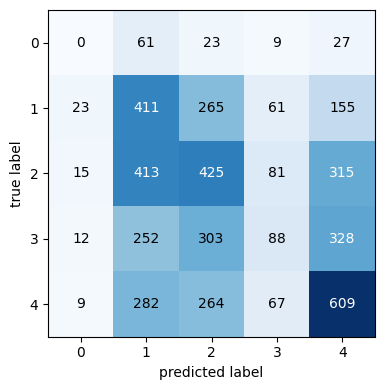

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.29      0.45      0.35       915
           2       0.33      0.34      0.34      1249
           3       0.29      0.09      0.14       983
           4       0.42      0.49      0.46      1231

    accuracy                           0.34      4498
   macro avg       0.27      0.27      0.26      4498
weighted avg       0.33      0.34      0.32      4498



In [936]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

# Dividir los datos en variables independientes X y la variable dependiente y (AdoptionSpeed)
X = df.drop(["AdoptionSpeed"], axis=1)
y = df.AdoptionSpeed

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Definir el clasificador QDA
qda = QuadraticDiscriminantAnalysis()

# Entrenar el modelo QDA con los datos de entrenamiento
qda.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
ypred = qda.predict(X_test)

# Calcular la matriz de confusión
matriz = confusion_matrix(y_test, ypred)

# Visualizar la matriz de confusión
plot_confusion_matrix(conf_mat=matriz, figsize=(4, 4), show_normed=False)
plt.tight_layout()
plt.show()

# Imprimir el informe de clasificación
print (classification_report(y_test, ypred))

In [937]:
import pandas as pd

# Supongamos que 'df' es tu DataFrame y 'categoria' es la columna de interés.
# Reemplaza 'df' y 'categoria' con los nombres adecuados en tu caso.

# Contar la frecuencia de cada categoría
frecuencia_categoria = df['AdoptionSpeed'].value_counts()

# Imprimir el resultado
print(frecuencia_categoria)


AdoptionSpeed
4    4197
2    4037
3    3259
1    3090
0     410
Name: count, dtype: int64


In [938]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Type           14993 non-null  int64
 1   Age            14993 non-null  int64
 2   Breed1         14993 non-null  int64
 3   Breed2         14993 non-null  int64
 4   Gender         14993 non-null  int64
 5   Color1         14993 non-null  int64
 6   Color2         14993 non-null  int64
 7   Color3         14993 non-null  int64
 8   MaturitySize   14993 non-null  int64
 9   FurLength      14993 non-null  int64
 10  Vaccinated     14993 non-null  int64
 11  Dewormed       14993 non-null  int64
 12  Sterilized     14993 non-null  int64
 13  Health         14993 non-null  int64
 14  Fee            14993 non-null  int64
 15  AdoptionSpeed  14993 non-null  int64
dtypes: int64(16)
memory usage: 1.8 MB


In [939]:
primeros_datos = df["Color1"].head()
print(primeros_datos)

0    1
1    1
2    2
3    1
4    1
Name: Color1, dtype: int64


                                    Ejemplo

In [944]:
caraterísticas_mascota=[1,5,20,20,1,1,2,7,2,1,1,1,2,0,0]
prediccion = classifier15.predict([caraterísticas_mascota])
print("La mascota será adopatada en la categoría:", prediccion[0])

La mascota será adopatada en la categoría: 2
